In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
math_url = "https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv"
df = pd.read_csv(math_url, sep=';')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df=df.select_dtypes(exclude=["object"]) # removing all non numerical columns

In [5]:
x=df.drop(columns=["G3"])
y=df["G3"]

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [8]:
model=Sequential([Dense(64,activation='relu'),
                Dense(64,activation='relu'),
                 Dense(64,activation='relu'),
                Dense(32,activation='relu'),
                 Dense(1,activation='linear')])

In [9]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [10]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 125.2630 - mae: 10.2293 - val_loss: 105.0542 - val_mae: 9.5034
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 98.7296 - mae: 9.0105 - val_loss: 71.6478 - val_mae: 7.8251
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 66.0123 - mae: 7.4091 - val_loss: 32.4318 - val_mae: 5.1419
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 27.5459 - mae: 4.4648 - val_loss: 26.2479 - val_mae: 3.3640
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.8253 - mae: 3.5216 - val_loss: 17.1942 - val_mae: 2.8670
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.4964 - mae: 2.8268 - val_loss: 13.0500 - val_mae: 2.7968
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.6629 - mae: 2.6923 - val_loss: 12.2319 - val_mae: 2.7023
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.3729 - mae: 2.5492 - val_loss: 12.0656 - val_mae: 2.7261
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - l

In [11]:
loss, mae = model.evaluate(x_test, y_test, verbose=0)
print(f"Test MAE: {mae:.2f}")
y_pred = model.predict(x_test)

Test MAE: 1.71
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [12]:
# Assume you have already calculated MAE

max_score = 20
accuracy_percent = (1 - (mae / max_score)) * 100

print(f"Approximate Accuracy: {accuracy_percent:.2f}%")

Approximate Accuracy: 91.44%


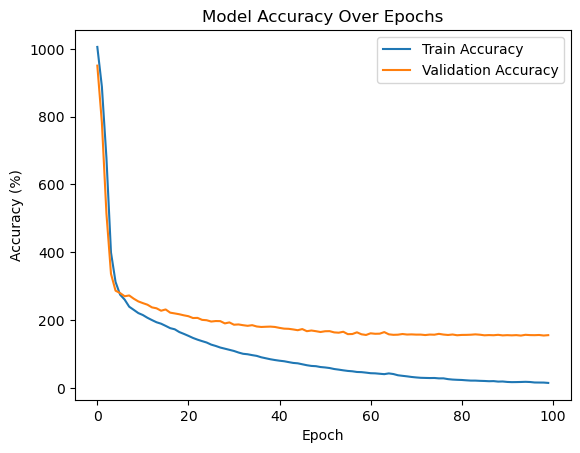

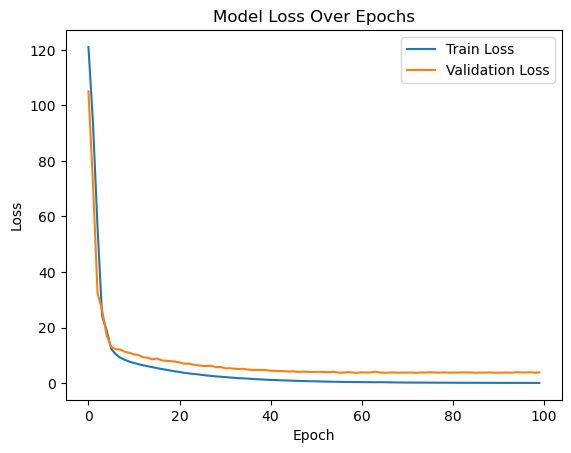

In [30]:
# Import correct module
import matplotlib.pyplot as plt

# Accuracy plot (percentage)
plt.plot([x * 100 for x in hist.history['mae']], label='Train Accuracy')
plt.plot([x * 100 for x in hist.history['val_mae']], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# Loss plot
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
